In [21]:
from IPython.display import IFrame

In [22]:
experiment = "results/popa"

In [23]:
IFrame(src=experiment+"/policy_loss.html", width=500, height=500)

In [24]:
IFrame(src=experiment+"/train_rewards.html", width=500, height=500)

In [25]:
IFrame(src=experiment+"/test_rewards.html", width=500, height=500)

In [1]:
import torch
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd


def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed



In [2]:
def plot_train_rewards(flocs, names, smoothing=0.9):
    
    for i in range(0, len(flocs)):
        metrics = torch.load(flocs[i])
        train_rewards = smooth(metrics["train_rewards"], smoothing)
        df = pd.DataFrame({"train_rewards" : train_rewards, "episodes": np.arange(len(train_rewards))+1})
        ax = sns.lineplot(x = "episodes", y="train_rewards", data=df, label=names[i])

In [29]:
def plot_test_rewards(flocs, names):
    
    for k in range(0, len(flocs)):
        metrics = torch.load(flocs[k])
        test_episodes = metrics["test_episodes"]
        test_rewards = metrics["test_rewards"]
        tot = len(test_episodes)
        trials = len(test_rewards[0])
        x = np.zeros(tot*trials)
        y = np.zeros(tot*trials)
        for i in range(0, len(test_episodes)):
            x[i*trials:(i+1)*trials] += test_episodes[i]
            for j in range(0, len(test_rewards[i])):
                y[i*trials + j] = test_rewards[i][j]
        df = pd.DataFrame({"test_rewards" : y, "episodes": x})
        ax = sns.lineplot(x = "episodes", y="test_rewards", data=df, label=names[k], estimator=np.median)


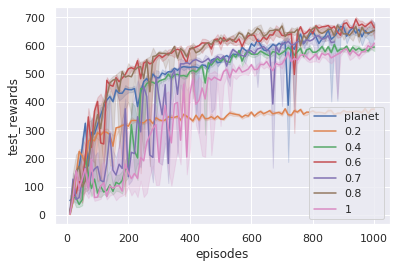

In [43]:
smoothing = 0.9
flocs = []
names = []

#flocs.append("results/pop_trial/metrics.pth")
#names.append("PLANET + poplin")

flocs.append("/mnt/data/mamini/planet/original/metrics.pth")
names.append("planet")

flocs.append("/mnt/data/mamini/planet/mppi_1_2_0.2/metrics.pth")
names.append("0.2")

flocs.append("/mnt/data/mamini/planet/mppi_1_2_0.4/metrics.pth")
names.append("0.4")

flocs.append("/mnt/data/mamini/planet/mppi_1_2_0.6/metrics.pth")
names.append("0.6")

flocs.append("/mnt/data/mamini/planet/mppi_1_2_0.7/metrics.pth")
names.append("0.7")

flocs.append("/mnt/data/mamini/planet/mppi_1_2_0.8/metrics.pth")
names.append("0.8")



flocs.append("/mnt/data/mamini/planet/mppi_1_2_1/metrics.pth")
names.append("1")


#plot_train_rewards(flocs, names, smoothing)
plot_test_rewards(flocs, names)

In [39]:
a = np.ones(1000)

gamma = 0.9
returns = 0
for i in range(len(a)):
    returns += (gamma**i)*a[i]

print(returns)

9.999999999999993


In [41]:
import math
math.exp(-5)

0.006737946999085467

In [18]:
np.random.randint(10, size=350)

array([4, 6, 9, 5, 9, 8, 7, 5, 0, 0, 9, 5, 4, 2, 7, 9, 9, 0, 4, 1, 4, 8,
       4, 4, 6, 3, 7, 2, 0, 0, 9, 4, 3, 7, 2, 8, 2, 7, 1, 9, 3, 4, 1, 4,
       4, 2, 4, 5, 1, 2, 2, 2, 6, 5, 9, 8, 0, 3, 1, 0, 8, 4, 4, 7, 1, 6,
       8, 7, 8, 1, 8, 2, 1, 5, 6, 5, 7, 9, 4, 8, 1, 9, 7, 8, 3, 4, 6, 9,
       5, 3, 7, 3, 1, 2, 6, 3, 7, 6, 3, 7, 6, 7, 3, 6, 5, 3, 7, 1, 5, 4,
       6, 9, 8, 9, 5, 4, 9, 7, 6, 5, 6, 5, 4, 4, 5, 3, 8, 9, 8, 8, 3, 2,
       2, 9, 3, 4, 6, 6, 2, 9, 6, 0, 3, 0, 0, 6, 7, 5, 0, 6, 5, 2, 1, 7,
       0, 8, 2, 2, 3, 9, 9, 8, 8, 8, 0, 2, 7, 9, 1, 8, 6, 2, 4, 1, 7, 9,
       6, 0, 4, 4, 5, 8, 9, 5, 7, 5, 4, 4, 7, 0, 9, 6, 5, 8, 4, 2, 1, 1,
       3, 8, 1, 0, 9, 2, 4, 5, 8, 7, 6, 2, 8, 5, 0, 1, 9, 5, 1, 4, 5, 3,
       1, 7, 0, 4, 5, 8, 2, 7, 3, 7, 1, 8, 7, 9, 4, 3, 8, 0, 3, 0, 5, 5,
       6, 4, 7, 2, 8, 5, 3, 1, 1, 8, 8, 8, 5, 6, 4, 9, 0, 7, 0, 5, 6, 6,
       3, 7, 2, 6, 6, 9, 2, 6, 7, 5, 7, 5, 6, 4, 4, 5, 4, 0, 1, 8, 9, 2,
       7, 7, 4, 6, 5, 0, 3, 6, 9, 5, 9, 2, 9, 7, 7,

In [19]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
